In [1]:
import os
import zipfile

In [2]:
# Assign training and validation set directories
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

2022-06-18 11:49:28.224746: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-18 11:49:28.224779: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

2022-06-18 11:50:07.480843: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-18 11:50:07.480877: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-18 11:50:07.480904: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fadilrisdian-X455LAB): /proc/driver/nvidia/version does not exist
2022-06-18 11:50:07.481513: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
100/100 - 88s - loss: 0.6903 - accuracy: 0.5235 - val_loss: 0.6716 - val_accuracy: 0.6260 - 88s/epoch - 883ms/step
Epoch 2/20
100/100 - 90s - loss: 0.6559 - accuracy: 0.6235 - val_loss: 0.6520 - val_accuracy: 0.6060 - 90s/epoch - 896ms/step
Epoch 3/20
100/100 - 80s - loss: 0.6055 - accuracy: 0.6745 - val_loss: 0.5911 - val_accuracy: 0.6870 - 80s/epoch - 798ms/step
Epoch 4/20
100/100 - 78s - loss: 0.5613 - accuracy: 0.7045 - val_loss: 0.5751 - val_accuracy: 0.7020 - 78s/epoch - 784ms/step
Epoch 5/20
100/100 - 79s - loss: 0.5361 - accuracy: 0.7285 - val_loss: 0.5662 - val_accuracy: 0.7020 - 79s/epoch - 788ms/step
Epoch 6/20
100/100 - 79s - loss: 0.5035 - accuracy: 0.7550 - val_loss: 0.5656 - val_accuracy: 0.7050 - 79s/epoch - 785ms/step
Epoch 7/20
100/100 - 79s - loss: 0.4805 - accuracy: 0.7605 - val_loss: 0.5482 - val_accuracy: 0.7230 - 79s/epoch - 786ms/step
Epoch 8/20
100/100 - 79s - loss: 0.4554 - accuracy: 0.7860 - val_loss: 0.5589 - val_accuracy: 0.7120 - 79s/epoch - 786

In [6]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

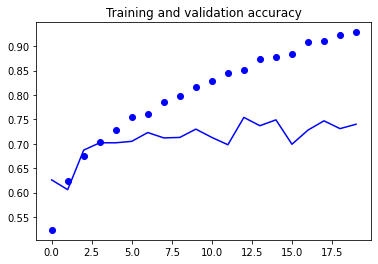

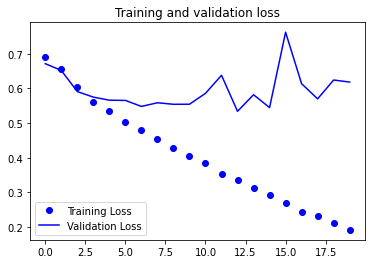

In [7]:
# Plot training results
plot_loss_acc(history)

In [ ]:
#It's overfitting, let's try to do augmentation

In [8]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 86s - loss: 0.6914 - accuracy: 0.5275 - val_loss: 0.6839 - val_accuracy: 0.5020 - 86s/epoch - 863ms/step
Epoch 2/20
100/100 - 84s - loss: 0.6805 - accuracy: 0.5645 - val_loss: 0.6536 - val_accuracy: 0.6010 - 84s/epoch - 838ms/step
Epoch 3/20
100/100 - 85s - loss: 0.6668 - accuracy: 0.5910 - val_loss: 0.6649 - val_accuracy: 0.5800 - 85s/epoch - 851ms/step
Epoch 4/20
100/100 - 85s - loss: 0.6487 - accuracy: 0.6105 - val_loss: 0.6187 - val_accuracy: 0.6530 - 85s/epoch - 850ms/step
Epoch 5/20
100/100 - 86s - loss: 0.6260 - accuracy: 0.6365 - val_loss: 0.6319 - val_accuracy: 0.6400 - 86s/epoch - 858ms/step
Epoch 6/20
100/100 - 84s - loss: 0.6213 - accuracy: 0.6460 - val_loss: 0.5721 - val_accuracy: 0.7030 - 84s/epoch - 840ms/step
Epoch 7/20
100/100 - 83s - loss: 0.6059 - accuracy: 0.6685 - val_loss: 0.5659 - val_accuracy: 0.7140 - 83s/epoch - 832ms/step
Epoch 8/20
100/100 - 83s - loss: 0

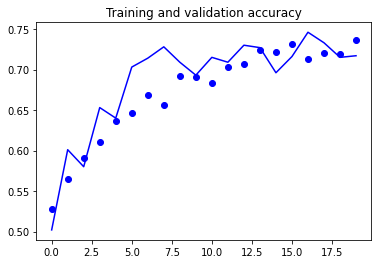

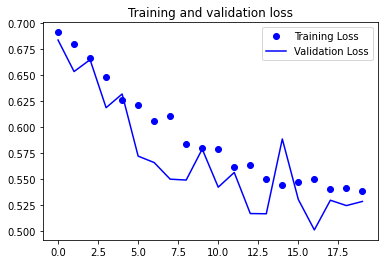

In [9]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)